1. Pick 5 cuisines and select 4 restaurants for each cuisine. Collect 200 reviews for each restaurant. (10 pts.)

Mexican
Pizza
Seafood
Spanish
Indian

In [5]:
import pandas as pd

In [6]:
# I saved the data into a .parquet file since I was having some weird formatting issue with .csv when joining them
df = pd.read_parquet('lots_o_data.parquet')

In [7]:
df.head(20)

,restaurant,review_text,cuisine
0,aroma,['This was yelp recommended. \xa0We spent a we...,indian
1,dario,['I love this place and they never disappoint ...,mexican
2,dockers,"[""I have had Dockers flagged on my map for yea...",seafood
3,him,['4.5 starts for excellent reason - it should ...,indian
4,hooked,['Great casual spot in montauk. I highly recom...,seafood
5,lobster,"[""Good food reasonable prices. \xa0Seasonal. S...",seafood
6,malinche,['Food was delicious! My sisters and I got tac...,mexican
7,nizam,"[""New traditions have been started over dining...",indian
8,noches,['Order food to go but it tastes great! Their ...,mexican
9,peque,['Bomb Mexican spot in Ironbound. Very authent...,mexican


In [36]:
rests = ['aroma','dario','dockers','him','hooked','lobster','malinche','nizam','noches','peque','pizza one','rosas','saaz','segovia','shrimp','spanish','toro','uncle pizza','villa','village']

In [ ]:
!pip install mpld3

In [5]:
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

3. Pre-process text (5 pts.)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

In [7]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [8]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [9]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in df['review_text']:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

4. Vectorize the corpus using TFIDF. (2 pts.)



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,1))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(df['review_text']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 22 s, sys: 76.6 ms, total: 22.1 s
Wall time: 22.5 s
(20, 1994)


In [18]:
terms = tfidf_vectorizer.get_feature_names_out()

print(terms)

['-the' '11pm' '1pm' ... 'ziti' 'zone' 'zucchini']


5. Build a dendrogram reflecting the hierarchical clustering results. (3 pts.)



In [32]:
titles = ['indian','mexican','seafood','indian','seafood','seafood','mexican','indian','mexican','mexican','pizza','pizza',
                   'indian','spanish','seafood','spanish','spanish','pizza','spanish','pizza']

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

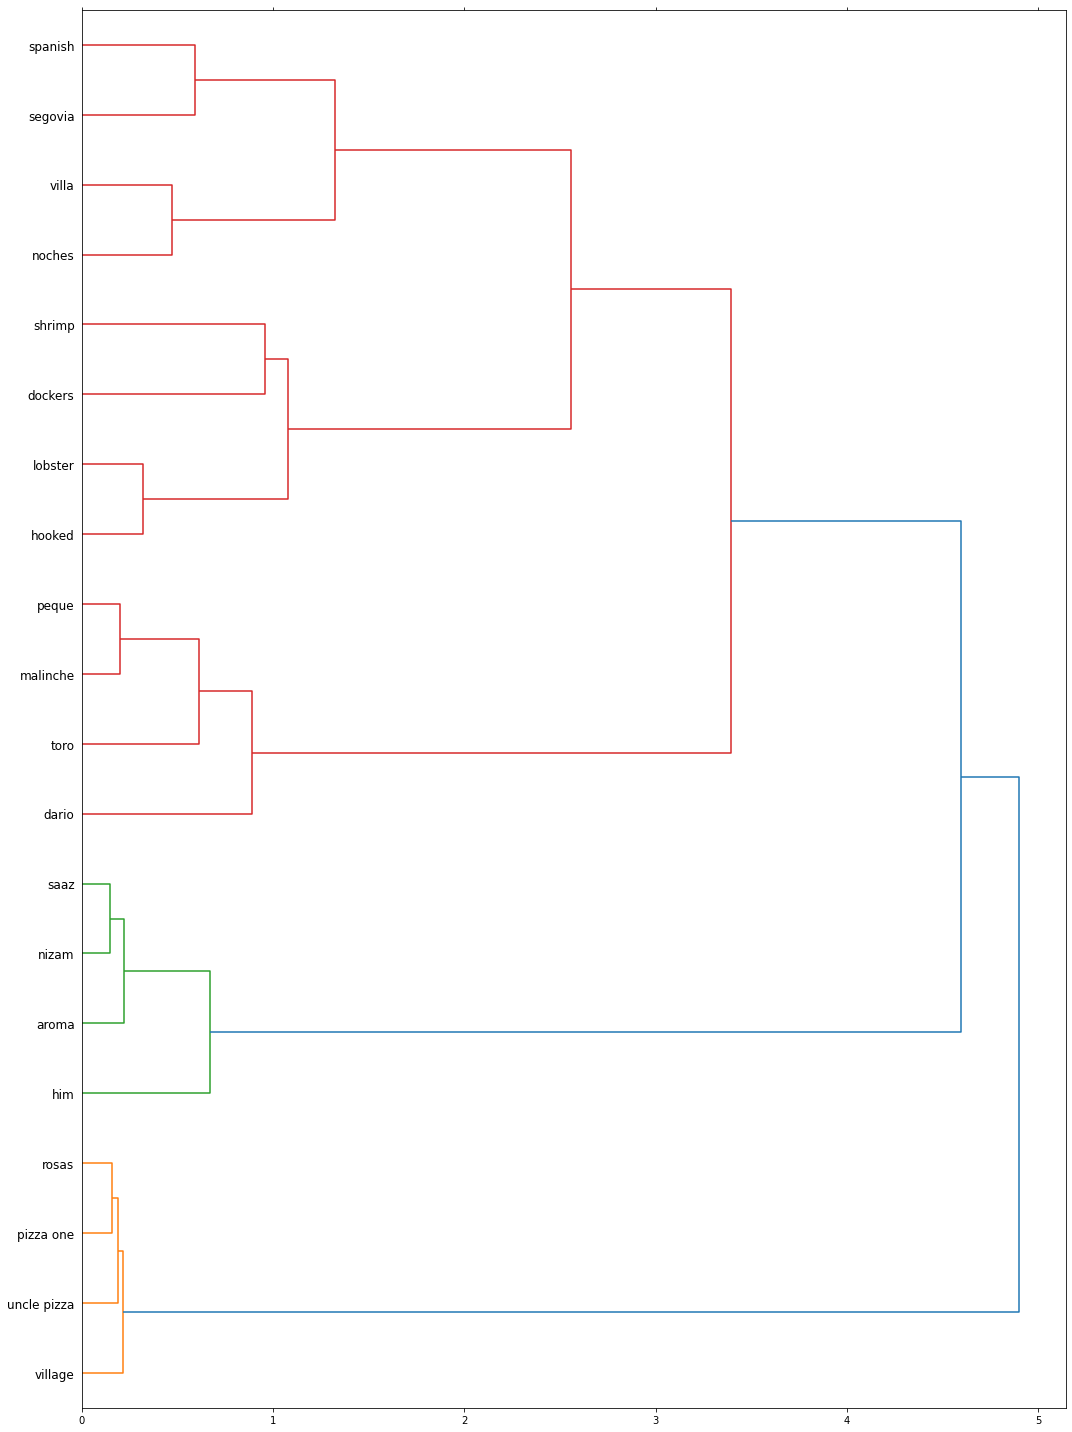

In [37]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=rests);

plt.tick_params(\
    axis= 'x',      
    which='both',     
    bottom='off',      
    top='off',         
    labelbottom='off')

plt.tight_layout() 

plt.savefig('ward_clusters.png', dpi=200)

6. Reflect on which cuisines appear more closely related to each other. Does the clustering solution make sense? (5 pts.)



The clustering solution definetly makes sense. 18/20 restaurants are grouped together by their correct category. The only instance where there was a 'incorrect' similarity drawn was between a mexican and spanish restarurant + vice versa. One of the mexican restaurants (NOCHE) had strong similarity with spanish restaurants and one of the spanish restaurants (TORO) had a strong similarity with the mexican restaurants. This was probably a mistake on my end for choosing such similar cuisines. Other than that swap the pizza, indian, and seafood restaurants are all correctly grouped together.